<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/ACIS-2023-New-Zealand/blob/main/Experiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Imbalance Techniques Experiment**

**Choose Imbalance Techniques:**
1. Resampling Methods:
  * Oversampling
    * SMOTE
    * ADASYN
  * Undersampling
    * Tomek links
    * Near Miss

2. Ensemble Techniques:
  * Random Forest
  * Boosting algorithms

3. Algorithm-specific Methods
  * XGBoost
  * LightGBM

4. Cost-sensitive Learning:  *Can be explored later, future research*

In [72]:
# Load the libraries

import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import psutil
import os

# Warning filter

import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics

from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV,cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, confusion_matrix, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

# Algorithmns models

import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Class imbalance

from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from sklearn.utils import resample

# Plot Theme

sns.set_theme(style="darkgrid")
plt.style.use("ggplot")

**Load Data**

In [73]:
data = pd.read_csv("Mental Health.csv")

In [74]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   self_employed             1430 non-null   int64
 1   no_employees              1430 non-null   int64
 2   tech_company              1430 non-null   int64
 3   company_role              1430 non-null   int64
 4   benefits                  1430 non-null   int64
 5   care_options              1430 non-null   int64
 6   wellness_program          1430 non-null   int64
 7   seek_help                 1430 non-null   int64
 8   anonymity                 1430 non-null   int64
 9   leave                     1430 non-null   int64
 10  mental_importance         1430 non-null   int64
 11  neg_consequence_coworker  1430 non-null   int64
 12  discuss_mh                1430 non-null   int64
 13  work_interfere            1430 non-null   int64
 14  coworkers                 1430 non-null 

### **Split Dataset**

In [75]:
X = data.drop(["mental_health_diagnosed"], axis=1)
y = data['mental_health_diagnosed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

### **Baseline Model**

In [76]:
# Define a list of classifiers
classifiers = {
    "SVM": SVC(),
    "NB_": GaussianNB(),
    "DT_": DecisionTreeClassifier(),
    "RF_": RandomForestClassifier(),
    "LR_": LogisticRegression()
}

--- SVM ---
Accuracy: 0.7867132867132867
Precision: 0.7628205128205128
Recall: 0.8321678321678322
F1 Score: 0.7959866220735786
ROC AUC: 0.7867132867132867
Kappa: 0.5734265734265734
Geometric Mean: 0.7853990576698846
Balanced Accuracy: 0.7867132867132867
Confusion Matrix:
[[106  37]
 [ 24 119]]


--- NB_ ---
Accuracy: 0.8531468531468531
Precision: 0.8435374149659864
Recall: 0.8671328671328671
F1 Score: 0.8551724137931034
ROC AUC: 0.8531468531468531
Kappa: 0.7062937062937062
Geometric Mean: 0.853032205984722
Balanced Accuracy: 0.8531468531468531
Confusion Matrix:
[[120  23]
 [ 19 124]]


--- DT_ ---
Accuracy: 0.8356643356643356
Precision: 0.8333333333333334
Recall: 0.8391608391608392
F1 Score: 0.8362369337979094
ROC AUC: 0.8356643356643357
Kappa: 0.6713286713286714
Geometric Mean: 0.8356570207714493
Balanced Accuracy: 0.8356643356643356
Confusion Matrix:
[[119  24]
 [ 23 120]]


--- RF_ ---
Accuracy: 0.8706293706293706
Precision: 0.8397435897435898
Recall: 0.916083916083916
F1 Score: 0.8

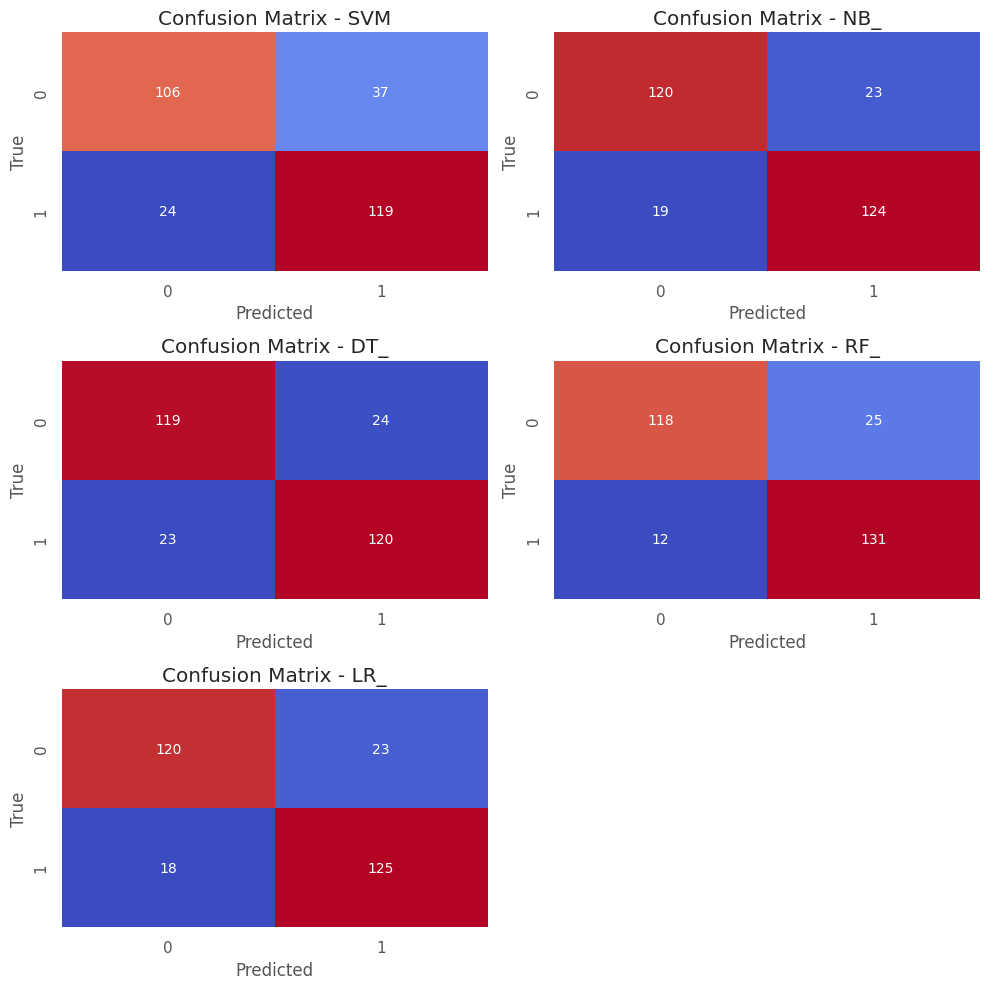

In [77]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    kappa = cohen_kappa_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    geometric_mean = geometric_mean_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Kappa": kappa,
        "Geometric Mean": geometric_mean,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy:", metrics["Accuracy"])
    print("Precision:", metrics["Precision"])
    print("Recall:", metrics["Recall"])
    print("F1 Score:", metrics["F1 Score"])
    print("ROC AUC:", metrics["ROC AUC"])
    print("Kappa:", metrics["Kappa"])
    print("Geometric Mean:", metrics["Geometric Mean"])
    print("Balanced Accuracy:", metrics["Balanced Accuracy"])
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

# Plot confusion matrices
plt.figure(figsize=(10, 10))
for i, (name, metrics) in enumerate(results.items()):
    plt.subplot(3, 2, i+1)
    sns.heatmap(metrics["Confusion Matrix"], annot=True, fmt="d", cmap="coolwarm", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
plt.tight_layout()
plt.show()

### **Apply Imbalance Techniques**

**Explore the class distribution**

In [78]:
class_counts = data['mental_health_diagnosed'].value_counts()
print(class_counts)

0    716
1    714
Name: mental_health_diagnosed, dtype: int64


*The dataset is relatively balanced, as the difference between the number of samples in each class is minimal.I will internally remove data to simulate different levels of class imbalance and compare the original data with the data after applying class imbalance techniques.This approach is known as undersampling, where you deliberately reduce the number of samples from the majority class to create a more imbalanced dataset.I will artificially create class imbalance and can observe how different models perform on imbalanced data compared to the original balanced data.*

**Artificial Class Imbalance**

Oversampling involves replicating samples from the minority class to increase its size and create a less imbalanced dataset.

In [79]:
majority_class = data[data['mental_health_diagnosed'] == 0]
minority_class = data[data['mental_health_diagnosed'] == 1]

# Determine the desired imbalance ratio
imbalance_ratio = 2  # For a 1:2 imbalance ratio

# Calculate the number of samples to replicate from the minority class
num_samples_to_replicate = int(len(majority_class) * imbalance_ratio)

# Randomly replicate samples from the minority class to match the desired imbalance ratio
oversampled_minority = resample(minority_class, replace=True, n_samples=num_samples_to_replicate, random_state=42)

# Combine the oversampled minority class with the majority class to create the imbalanced dataset
imbalanced_data = pd.concat([majority_class, oversampled_minority])

# Shuffle the dataset to ensure random order of samples
imbalanced_data = imbalanced_data.sample(frac=1, random_state=42)

In [80]:
updated_class_counts = imbalanced_data['mental_health_diagnosed'].value_counts()
print(updated_class_counts)

1    1432
0     716
Name: mental_health_diagnosed, dtype: int64


#### **Resampling Methods**

1. Synthetic Minority Over-sampling Technique (SMOTE)